In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline

In [2]:
# pandas options
pd.options.display.max_rows = 6

In [3]:
inFile = r'.\Groundwater-Levels\B24F0047001_0.csv'
df = pd.read_csv(inFile, skiprows=10, parse_dates=[2], index_col =2)

In [4]:
df

,LOCATIE,FILTERNUMMER,STAND (MV),BIJZONDERHEID
PEIL DATUM TIJD,,,,
1970-04-28 00:00:00,B24F0047,1,585,NaN
1970-05-14 00:00:00,B24F0047,1,589,NaN
1970-05-28 00:00:00,B24F0047,1,584,NaN
...,...,...,...,...
2013-06-27 16:08:00,B24F0047,1,485,NaN
2014-10-01 14:02:00,B24F0047,1,506,NaN
2015-09-10 12:02:00,B24F0047,1,535,NaN


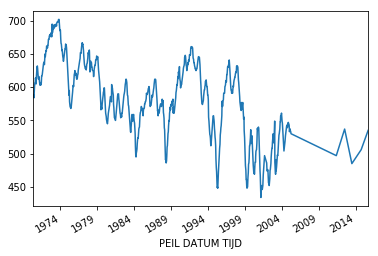

In [5]:
df['STAND (MV)'].plot()

## Load all the files in a folder

In [6]:
correct_cols = ['Locatie', 'Filternummer','Peildatum', 'Stand (cm t.o.v. MP)',
       'Stand (cm t.o.v. MV)', 'Stand (cm t.o.v. NAP)', 'Bijzonderheid',
       'Opmerking', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10']

In [7]:
inFolder = r'.\Groundwater-Levels'
#os.listdir(inFolder)

In [8]:
def read_header(file):
    i=0
    loc=0
    with open(file) as f:
        for line in f:
            if line[:7]=='Locatie':
                loc = loc + 1
                if loc==1:
                    metarow = i
                if loc==2:
                    #print('over')
                    #print(i)
                    skiprows = i
                    break
            i=i+1
    return metarow,skiprows

In [9]:
def get_xy(file,metarow):
    with open(file) as f:
        lines = f.readlines()
    line = lines[metarow+1].split(',')
    return [int(x) for x in line[3:5]]

In [10]:
df_list = []
for file in os.listdir(inFolder):
    
    wellFile,ext = os.path.splitext(file)
    if wellFile[-2:] == '_1':
        print(file,end=', ')
        try:
            # read header 
            metarow,skiprows = read_header(inFolder + '\\' +file)
            (x,y) = get_xy(inFolder + '\\' +file,metarow)
            # read data
            df = pd.read_csv(inFolder + '\\' +file, skiprows=skiprows,index_col=False, parse_dates=[2],dayfirst=True)
            
            # check if the right columns were imported
            ll = [i for i, j in zip(df.columns.tolist(), correct_cols) if i != j ]
            if len(ll)==0: 
                # it's ok
                df['x'] = x
                df['y'] = y
                df_list.append(df)
                print('ok')                
            else:
                print('wrong columns')
        except:
            print('error')

# merge all the dataframes
all_dfs = pd.concat(df_list)

B24F0047001_1.csv, ok
B24F0047002_1.csv, ok
B24F0107001_1.csv, ok
B24H0302001_1.csv, error
B24H0371001_1.csv, ok
B24H0371004_1.csv, ok
B24H1244001_1.csv, ok
B25A0537001_1.csv, ok
B25A0538001_1.csv, ok
B25A0540001_1.csv, ok
B25A0541001_1.csv, ok
B25A0543001_1.csv, ok
B25A0549001_1.csv, ok
B25A0549002_1.csv, ok
B25A0554001_1.csv, ok
B25A0554002_1.csv, ok
B25A0556001_1.csv, ok
B25A0556002_1.csv, ok
B25A0556003_1.csv, ok
B25A0828001_1.csv, ok
B25A0828002_1.csv, ok
B25A0857001_1.csv, ok
B25A0857002_1.csv, ok
B25A1211001_1.csv, error
B25A1211002_1.csv, ok
B25A1211003_1.csv, ok
B25A1212001_1.csv, ok
B25A1212002_1.csv, ok
B25A1212003_1.csv, ok
B25A1212004_1.csv, ok
B25A1320001_1.csv, ok
B25A1320002_1.csv, ok
B25A1395001_1.csv, ok
B25A1395002_1.csv, ok
B25A1395003_1.csv, ok
B25A1395004_1.csv, ok
B25A1507001_1.csv, ok
B25A1507002_1.csv, ok
B25A1507003_1.csv, ok
B25A1507004_1.csv, ok
B25A1512001_1.csv, ok
B25A1517001_1.csv, ok
B25A1517002_1.csv, ok
B25A1542001_1.csv, ok
B25A1543001_1.csv, ok
B25A

In [11]:
# set index
all_dfs.set_index(['Locatie','Filternummer','Peildatum'],inplace=True)

In [12]:
all_dfs

Stand (cm t.o.v. MP)  Stand (cm t.o.v. MV)  \
Locatie  Filternummer Peildatum                                                
B24F0047 1            1970-04-28                 584.0                 585.0   
                      1970-05-14                 588.0                 589.0   
                      1970-05-28                 583.0                 584.0   
...                                                ...                   ...   
B25A1549 1            1997-11-28                  83.0                  98.0   
                      1997-12-15                  78.0                  93.0   
                      1997-12-29                  77.0                  92.0   

                                  Stand (cm t.o.v. NAP) Bijzonderheid  \
Locatie  Filternummer Peildatum                                         
B24F0047 1            1970-04-28                  195.0           NaN   
                      1970-05-14                  191.0           NaN   
                      1970-05-28                  196.0           NaN   
...                                                 ...           ...   
B25A1549 1            1997-11-28                  -88.0           NaN   
                      1997-12-15                  -83.0           NaN   
                      1997-12-29                  -82.0           NaN   

                                 Opmerking  Unnamed: 8  Unnamed: 9  \
Locatie  Filternummer Peildatum                                      
B24F0047 1            1970-04-28       NaN         NaN         NaN   
                      1970-05-14       NaN         NaN         NaN   
                      1970-05-28       NaN         NaN         NaN   
...                                    ...         ...         ...   
B25A1549 1            1997-11-28       NaN         NaN         NaN   
                      1997-12-15       NaN         NaN         NaN   
                      1997-12-29       NaN         NaN         NaN   

                                  Unnamed: 10       x       y  
Locatie  Filternummer Peildatum                                
B24F0047 1            1970-04-28          NaN   99920  489815  
                      1970-05-14          NaN   99920  489815  
                      1970-05-28          NaN   99920  489815  
...                                       ...     ...     ...  
B25A1549 1            1997-11-28          NaN  105033  488347  
                      1997-12-15          NaN  105033  488347  
                      1997-12-29          NaN  105033  488347  

[71655 rows x 10 columns]

In [13]:
# list the well numbers
all_dfs.index.get_level_values(0).unique()

Index(['B24F0047', 'B24F0107', 'B24H0371', 'B24H1244', 'B25A0537', 'B25A0538',
       'B25A0540', 'B25A0541', 'B25A0543', 'B25A0549', 'B25A0554', 'B25A0556',
       'B25A0828', 'B25A0857', 'B25A1211', 'B25A1212', 'B25A1320', 'B25A1395',
       'B25A1507', 'B25A1512', 'B25A1517', 'B25A1542', 'B25A1543', 'B25A1546',
       'B25A1547', 'B25A1548', 'B25A1549'],
      dtype='object', name='Locatie')

In [14]:
# select only the interesting columns
all_depths = all_dfs[['Stand (cm t.o.v. NAP)','x','y']]
all_depths = all_depths.rename(columns={'Stand (cm t.o.v. NAP)':'depth'})

In [15]:
# some global stats
all_depths.describe().T

,count,mean,std,min,25%,50%,75%,max
depth,65890.0,-15.879314,142.031544,-529.0,-84.0,-55.0,28.0,437.0
x,71655.0,102711.619147,2142.434790,99793.0,100900.0,102490.0,104630.0,108260.0
y,71655.0,488596.966311,1589.758769,484691.0,487620.0,489400.0,489815.0,490467.0


In [16]:
# table with average depths
all_depths.mean(level=[0,1]).style

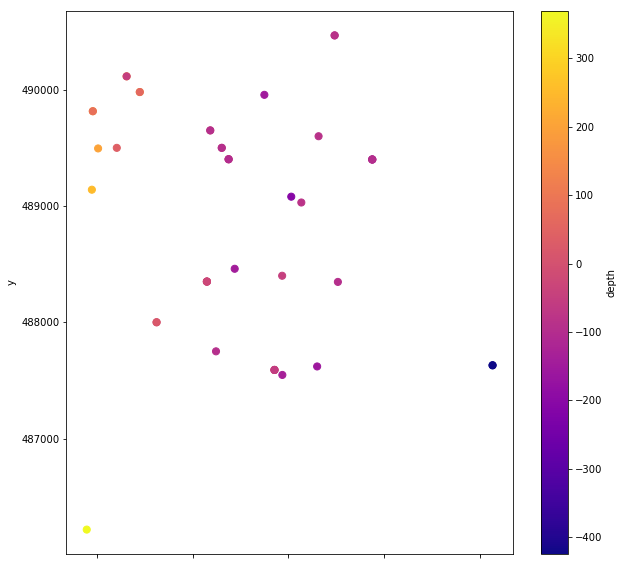

In [17]:
# plot on a map
means = all_depths.mean(level=[0,1])
means.plot.scatter(x='x',y='y',c='depth', cmap='plasma', s=50, figsize=(10,10))